<a href="https://colab.research.google.com/github/busraayukselll/Pusula_Busra_Yuksel/blob/main/Pusula_Intern_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kurulum ve okuma**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import files
uploaded = files.upload()

url = "https://raw.githubusercontent.com/busraayukselll/Pusula_Busra_Yuksel/main/Talent_Academy_Case_DT_2025.xlsx"
df = pd.read_excel(url)
df.head()


**Hızlı genel bakış**

In [ ]:
print("Şekil (satır, sütun):", df.shape)

print("\n--- df.info() ---")
df.info()

print("\n--- Sayısal özet ---")
print(df.describe())

print("\n--- Eksik değer sayıları ---")
print(df.isnull().sum().sort_values(ascending=False))

missing = df.isnull().mean()*100
missing[missing>0].sort_values().plot(kind="barh", figsize=(8,4))
plt.title("Eksik Değer Oranları (%)")

Şekil (satır, sütun): (2235, 13)

--- df.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB

--- Sayısal özet ---
             HastaNo          Yas
count    2235.000000  2235.000000
mean   145333.100224   

Tedavi süresi ve Uygulama süresi alanlarının sayısallaştırılması

In [ ]:
import re

def extract_first_int(x):
    if pd.isna(x): return np.nan
    m = re.search(r"\d+", str(x))
    return int(m.group()) if m else np.nan

df["TedaviSuresi_num"]   = df["TedaviSuresi"].apply(extract_first_int)
df["UygulamaSuresi_dk"]  = df["UygulamaSuresi"].apply(extract_first_int)

df[["TedaviSuresi","TedaviSuresi_num","UygulamaSuresi","UygulamaSuresi_dk"]].head(8)


,TedaviSuresi,TedaviSuresi_num,UygulamaSuresi,UygulamaSuresi_dk
0,5 Seans,5,20 Dakika,20
1,15 Seans,15,20 Dakika,20
2,15 Seans,15,20 Dakika,20
3,15 Seans,15,5 Dakika,5
4,15 Seans,15,20 Dakika,20
5,15 Seans,15,20 Dakika,20
6,10 Seans,10,30 Dakika,30
7,10 Seans,10,20 Dakika,20


Kullanılacak yardımcı fonksiyonlar

In [ ]:
def plot_hist_box(series, title, bins=30):
    fig, ax = plt.subplots(1, 2, figsize=(12,4))
    sns.histplot(series.dropna(), bins=bins, kde=True, ax=ax[0])
    ax[0].set_title(f"{title} - Histogram")
    sns.boxplot(x=series.dropna(), ax=ax[1])
    ax[1].set_title(f"{title} - Boxplot")
    plt.show()

def plot_count(colname, top=None):
    counts = df[colname].value_counts(dropna=False)
    if top: counts = counts.head(top)
    plt.figure(figsize=(10,4 + 0.25*len(counts)))
    sns.barplot(x=counts.values, y=counts.index, orient="h")
    plt.title(f"{colname} - Dağılım" + (f" (Top {top})" if top else ""))
    plt.xlabel("Sayı")
    plt.ylabel(colname)
    plt.show()

def split_list_cell(s):
    if pd.isna(s): return []
    return [t.strip() for t in str(s).split(",") if t.strip()]


Verilerin genel dağılımları
**Histogram ve Boxplot grafikleri**


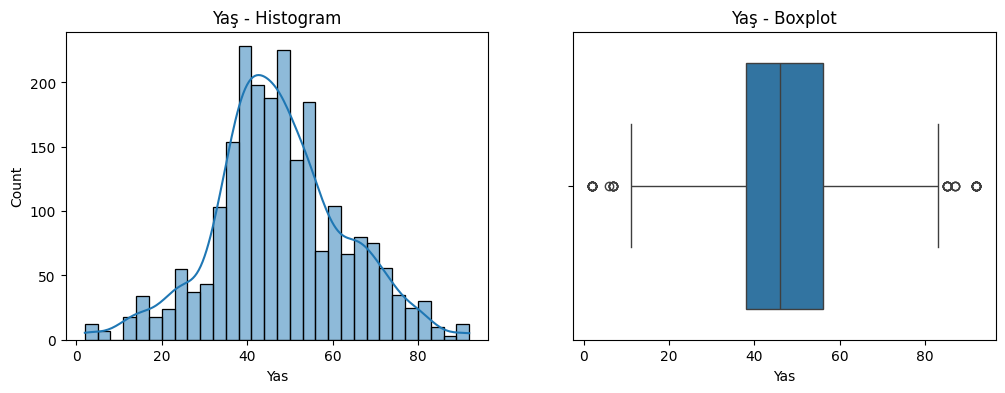

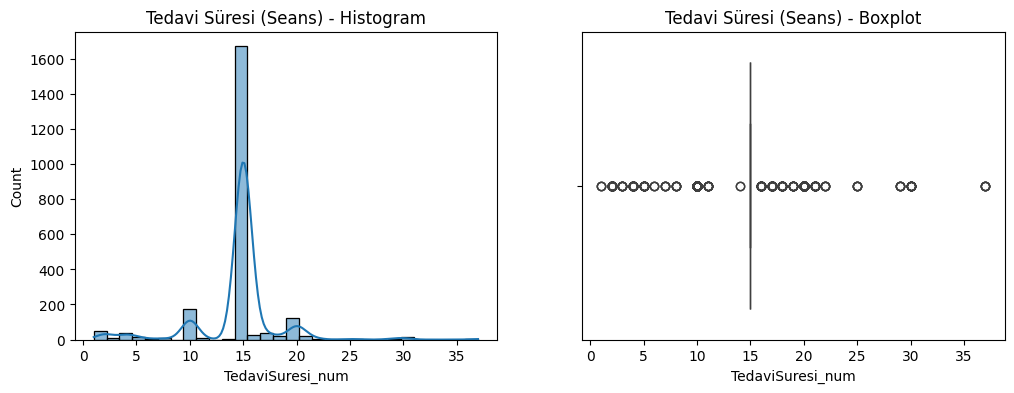

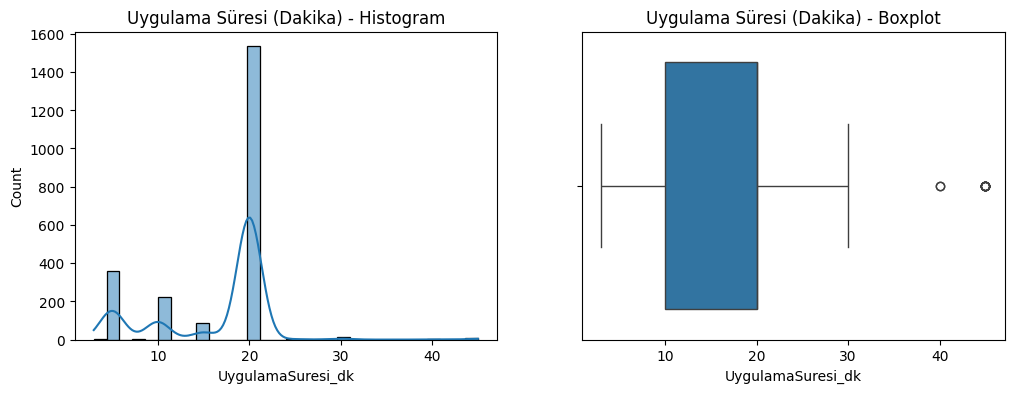

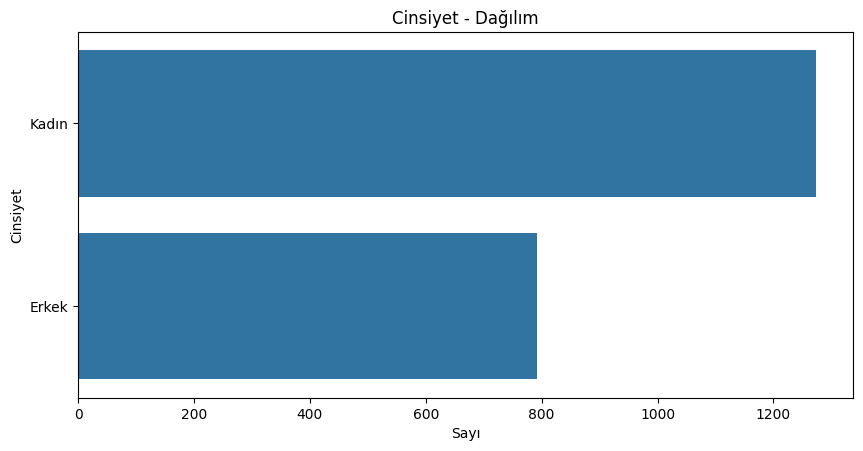

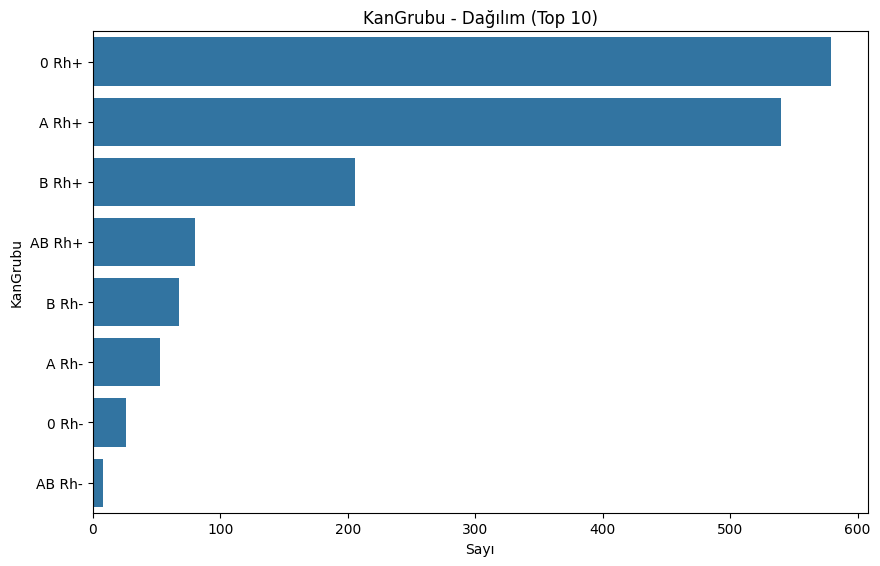

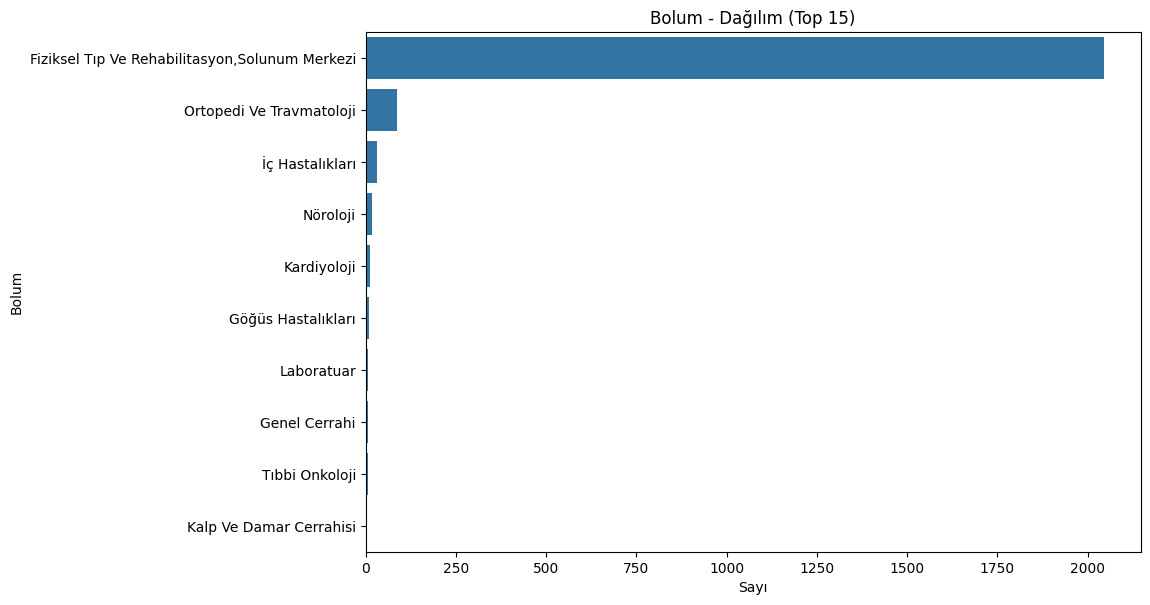

In [ ]:
# Sayısal
plot_hist_box(df["Yas"], "Yaş")
plot_hist_box(df["TedaviSuresi_num"], "Tedavi Süresi (Seans)")
plot_hist_box(df["UygulamaSuresi_dk"], "Uygulama Süresi (Dakika)")

# Kategorik (tam ve/veya top-N)
plot_count("Cinsiyet")
plot_count("KanGrubu", top=10)
plot_count("Bolum", top=15)


Veriler arasındaki ilişkiler

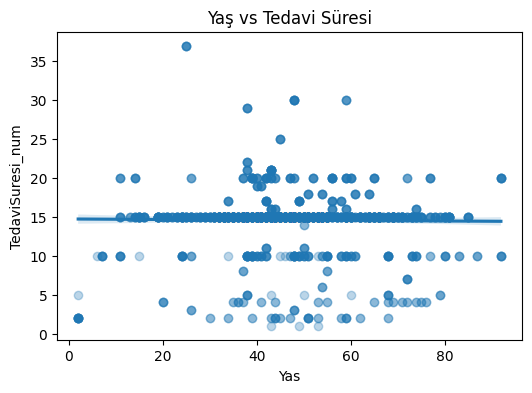

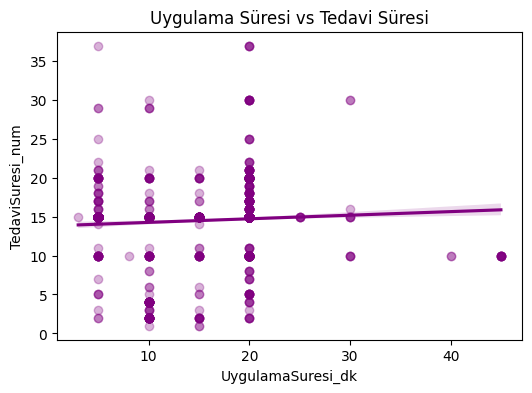

In [ ]:
plt.figure(figsize=(6,4))
sns.regplot(x="Yas", y="TedaviSuresi_num", data=df, scatter_kws={"alpha":0.3})
plt.title("Yaş vs Tedavi Süresi")
plt.show()

plt.figure(figsize=(6,4))
sns.regplot(x="UygulamaSuresi_dk", y="TedaviSuresi_num", data=df, scatter_kws={"alpha":0.3}, color="purple")
plt.title("Uygulama Süresi vs Tedavi Süresi")
plt.show()


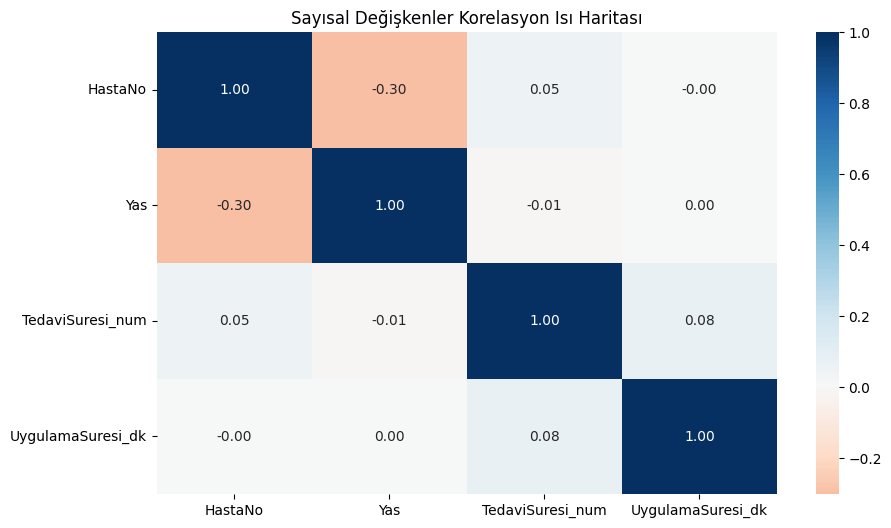

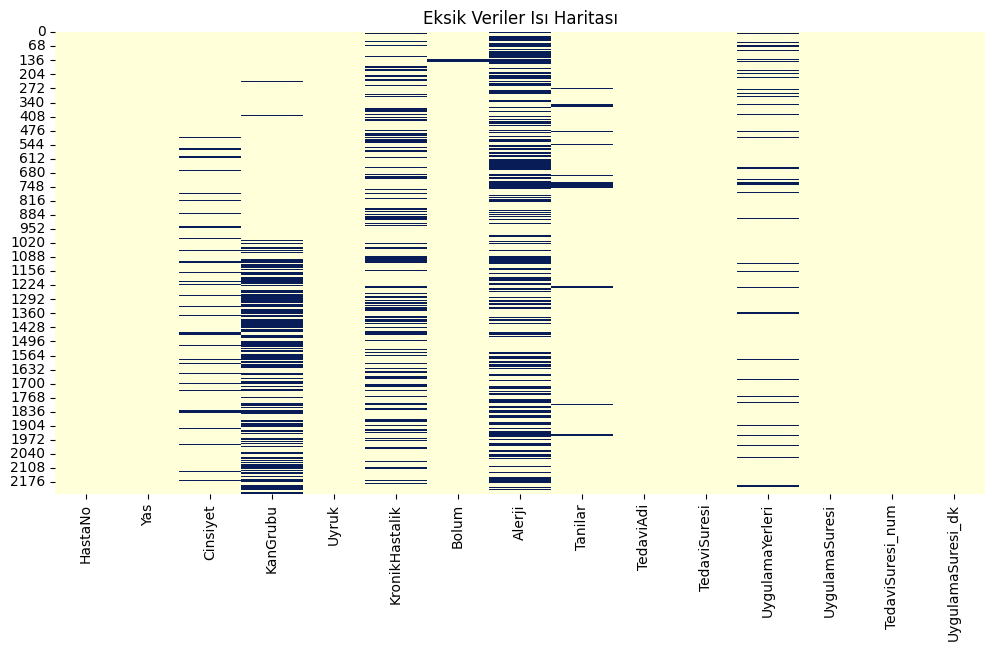

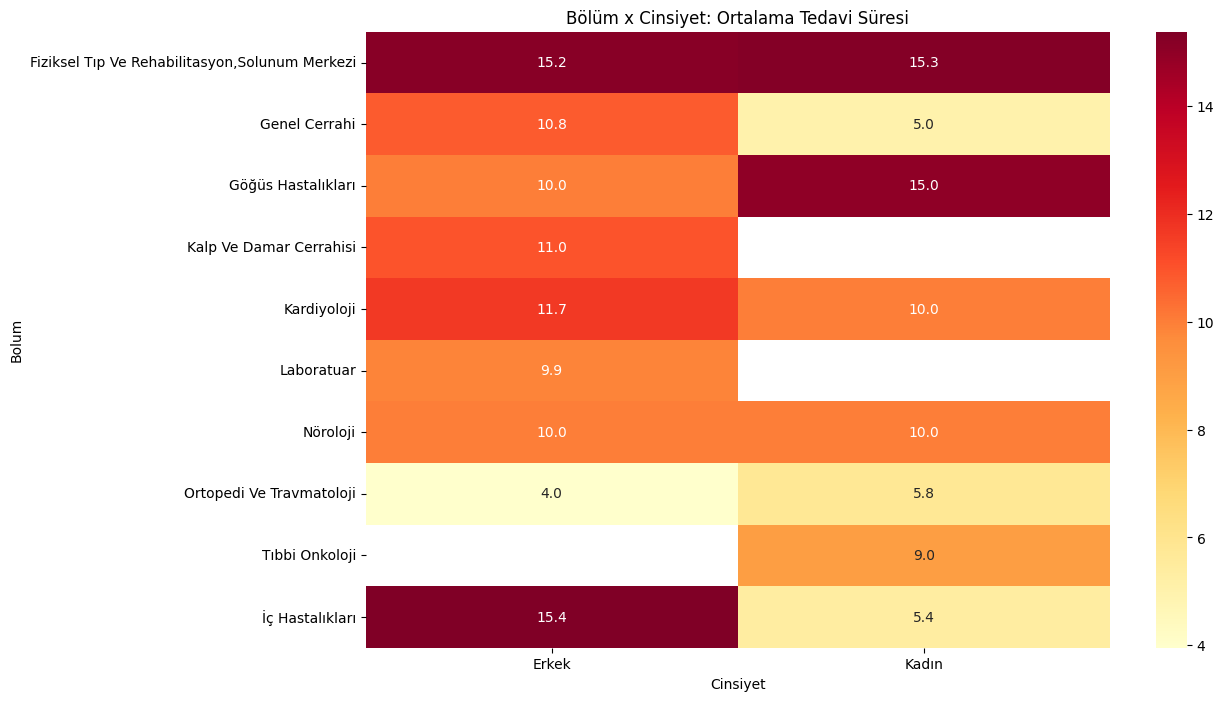

In [ ]:
# Tüm sayısal korelasyon
num_df = df.select_dtypes(include=["number"])
plt.figure(figsize=(10,6))
sns.heatmap(num_df.corr(), annot=True, cmap="RdBu", center=0, fmt=".2f")
plt.title("Sayısal Değişkenler Korelasyon Isı Haritası")
plt.show()

# Eksik veri ısı haritası
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Eksik Veriler Isı Haritası")
plt.show()

# Bölüm x Cinsiyet -> Ortalama Tedavi Süresi
pivot_bc = df.pivot_table(index="Bolum", columns="Cinsiyet", values="TedaviSuresi_num", aggfunc="mean")
plt.figure(figsize=(12,8))
sns.heatmap(pivot_bc, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("Bölüm x Cinsiyet: Ortalama Tedavi Süresi")
plt.show()


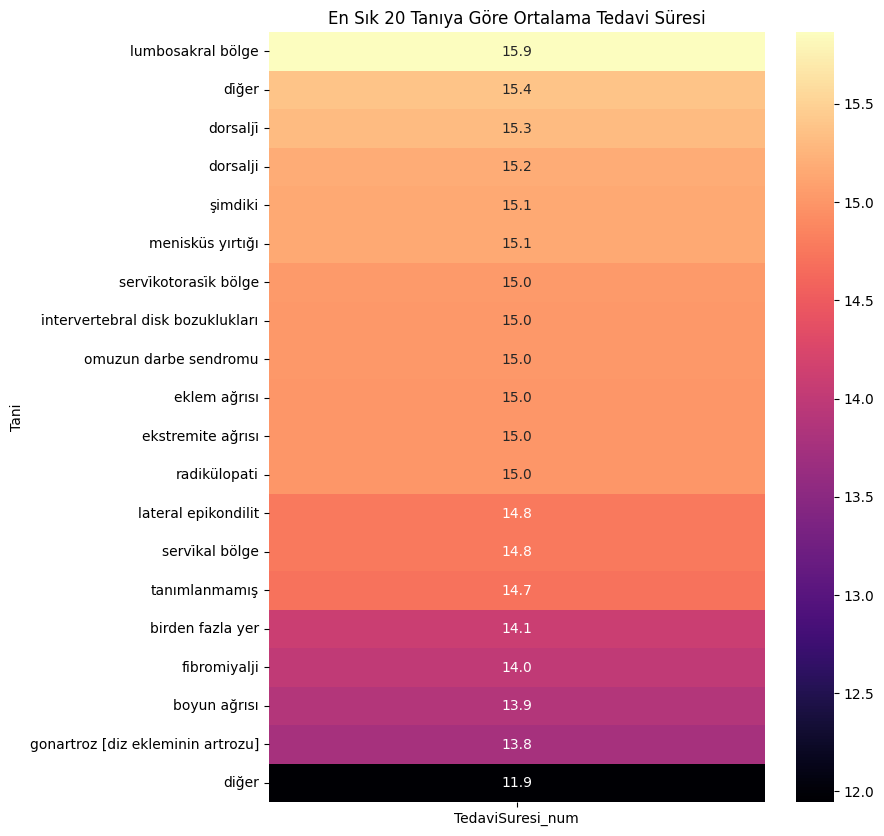

In [ ]:
# Tanılar (virgülle ayrılmış) -> explode
tanilar_exploded = df.assign(Tani=df["Tanilar"].apply(split_list_cell)).explode("Tani")
tanilar_exploded["Tani"] = tanilar_exploded["Tani"].str.lower().str.strip()
tanilar_exploded = tanilar_exploded[tanilar_exploded["Tani"].notna() & (tanilar_exploded["Tani"]!="")]

# En sık 20 tanı için ortalama tedavi süresi
top_tani = tanilar_exploded["Tani"].value_counts().head(20).index
tani_pivot = tanilar_exploded[tanilar_exploded["Tani"].isin(top_tani)] \
    .pivot_table(index="Tani", values="TedaviSuresi_num", aggfunc="mean") \
    .sort_values("TedaviSuresi_num", ascending=False)

plt.figure(figsize=(8,10))
sns.heatmap(tani_pivot, annot=True, fmt=".1f", cmap="magma")
plt.title("En Sık 20 Tanıya Göre Ortalama Tedavi Süresi")
plt.show()


In [ ]:
tanilar_exploded["Tani"].dropna().unique()   # ilk 50 tanı


array(['ayak bileği ve ayağın yüzeysel yaralanması',
       'omuzun darbe sendromu', 'dorsalji̇', 'di̇ğer',
       'servi̇kotorasi̇k bölge', 'parapleji ve tetrapleji', 'artroz',
       'tanımlanmamış', 'el', 'trokanterik bursit', 'eklem ağrısı',
       'bisipital tendinit', 'lenfödem', 'başka yerde sınıflanmamış',
       'ekstremite ağrısı', 'esansiyel (primer) hipertansiyon',
       'diyabetes mellitüs', 'diğer tanımlanmış',
       'kronik iskemik kalp hastalığı', 'mitral kapak yetmezliği',
       'deliryum', 'demans üzerine eklenen', 'parkinson hastalığı',
       'böbrek yetmezlikleri', 'konjestif kalp yetmezliği',
       'akut apandisit', 'peritoneal apse ile',
       'tanımlanmamış komplikasyonlarla birlikte',
       'demans üzerine eklenmeyen', 'kronik böbrek yetmezliği',
       'kalp yetmezliği', 'aşil tendon yaralanması',
       'i̇ntervertebral disk bozuklukları', 'ortopedik eklem implantı',
       'gonartroz [diz ekleminin artrozu]', 'spinal stenoz',
       'lumbosakral bölge'

Aynı şeyin farklı yazımları var (dorsalji, 'dorsalji̇', ’dorsalji gibi)

Özel karakter / boşluk / Unicode bozuklukları var (\u200b, \xaddi̇ğer, servi̇kal\xa0bölge`)

Benzer kategoriler var (diyabetes mellitüs vs diyabet)

Bir kısım açıklamalar içeriyor (gonartroz [diz ekleminin artrozu])

In [ ]:
import unicodedata
import re

def clean_tani_eda(x):
    if pd.isna(x):
        return np.nan
    # unicode normalizasyonu (örn. i̇ → i)
    s = unicodedata.normalize("NFKC", str(x)).lower().strip()
    # fazla boşluk ve kontrol karakterlerini sil
    s = re.sub(r"[\u200b-\u200f\xad]", "", s)  # zero-width, soft hyphen vb.
    s = re.sub(r"\s+", " ", s)  # çoklu boşlukları tekle
    # köşeli parantez içlerini temizle
    s = re.sub(r"\[.*?\]", "", s).strip()
    return s

tanilar_exploded["Tani_clean"] = tanilar_exploded["Tani"].apply(clean_tani_eda)


In [ ]:

tanilar_exploded["Tani_clean"].value_counts().head(30)


,count
Tani_clean,
dorsalji̇,696
di̇ğer,682
tanımlanmamış,411
omuzun darbe sendromu,274
i̇ntervertebral disk bozuklukları,270
lumbosakral bölge,266
servi̇kotorasi̇k bölge,214
servi̇kal bölge,150
eklem ağrısı,115


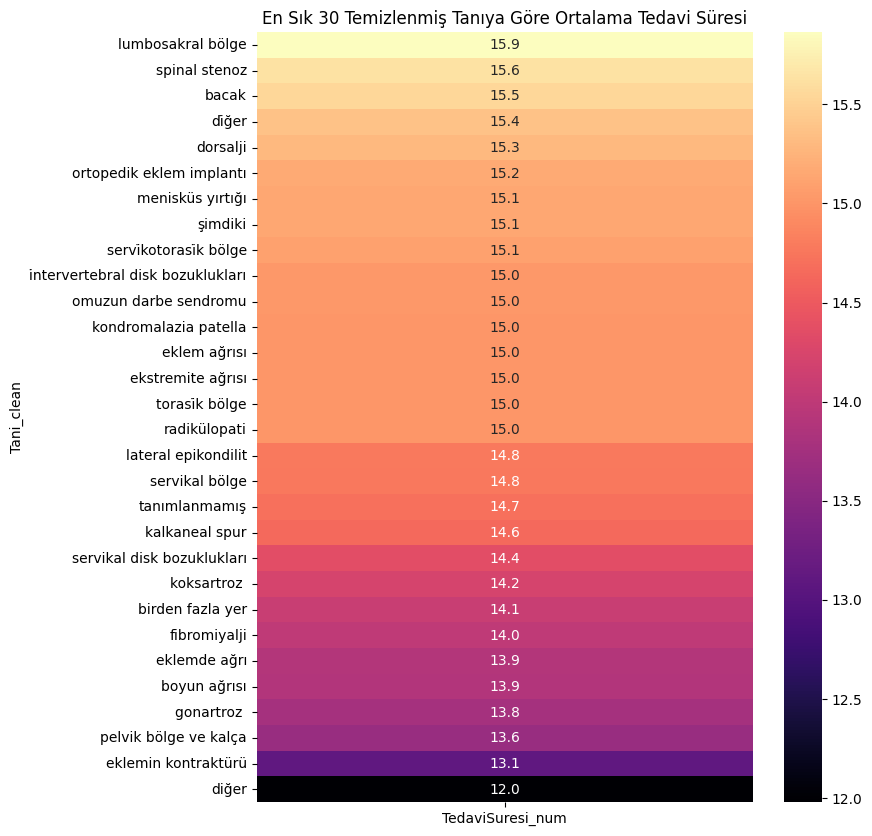

In [ ]:
import unicodedata, re

#  Temizlik fonksiyonu
def clean_tani(x):
    if pd.isna(x): return np.nan
    s = unicodedata.normalize("NFKC", str(x)).lower().strip()
    s = re.sub(r"[\u200b-\u200f\xad]", "", s)  # görünmez karakterleri sil
    s = re.sub(r"\s+", " ", s)                 # çoklu boşluğu tek yap
    s = re.sub(r"\[.*?\]", "", s)              # köşeli parantez içlerini temizle
    # manuel mapping örnekleri
    mapping = {
        "dorsalji̇": "dorsalji",
        "'dorsalji̇": "dorsalji",
        "servi̇kal bölge": "servikal bölge",
        "servikal bölge": "servikal bölge",
        "gonartroz [diz ekleminin artrozu]": "gonartroz",
        "diyabetes mellitüs": "diyabet"
    }
    return mapping.get(s, s)

# Tanıları explode + temizle
tanilar_exploded = df.assign(Tani=df["Tanilar"].apply(split_list_cell)).explode("Tani")
tanilar_exploded["Tani_clean"] = tanilar_exploded["Tani"].apply(clean_tani)
tanilar_exploded = tanilar_exploded[tanilar_exploded["Tani_clean"].notna() & (tanilar_exploded["Tani_clean"]!="")]

# 3) En sık 30 temiz tanı
top_tani_clean = tanilar_exploded["Tani_clean"].value_counts().head(30).index


# 4) Pivot tablo
tani_pivot_clean = tanilar_exploded[tanilar_exploded["Tani_clean"].isin(top_tani_clean)] \
    .pivot_table(index="Tani_clean", values="TedaviSuresi_num", aggfunc="mean") \
    .sort_values("TedaviSuresi_num", ascending=False)

# 5) Görselleştir
plt.figure(figsize=(8,10))
sns.heatmap(tani_pivot_clean, annot=True, fmt=".1f", cmap="magma")
plt.title("En Sık 30 Temizlenmiş Tanıya Göre Ortalama Tedavi Süresi")
plt.show()


In [ ]:
tanilar_exploded["Tani_clean"].value_counts().head(50)


,count
Tani_clean,
dorsalji,802
di̇ğer,678
tanımlanmamış,409
omuzun darbe sendromu,274
i̇ntervertebral disk bozuklukları,270
lumbosakral bölge,266
servi̇kotorasi̇k bölge,212
servikal bölge,148
eklem ağrısı,115


# **PreProssesing**

In [ ]:
# Ana veriyi kopyala
df_prep = df.copy()

Yardımcı Fonksiyonlar

In [ ]:

def extract_first_int(x):
    """Metindeki ilk tam sayıyı yakala (yoksa NaN)."""
    if pd.isna(x): return np.nan
    m = re.search(r"\d+", str(x))
    return int(m.group()) if m else np.nan

def normalize_text(s):
    """Unicode normalize + trim + lower + görünmez karakterleri temizle."""
    if s is None or (isinstance(s, float) and pd.isna(s)): return np.nan
    s = unicodedata.normalize("NFKC", str(s)).strip().lower()
    s = re.sub(r"[\u200b-\u200f\xad]", "", s)   # zero-width, soft hyphen vb.
    s = re.sub(r"\s+", " ", s)
    return s

def split_list_cell(s):
    """Virgülle ayrılmış hücreyi listeye çevir."""
    if pd.isna(s): return []
    return [t.strip() for t in str(s).split(",") if str(t).strip()]


In [ ]:
# Tüm object kolonları normalize et
obj_cols = df_prep.select_dtypes(include=["object"]).columns.tolist()
for c in obj_cols:
    df_prep[c] = df_prep[c].apply(normalize_text)

# Kan grubu: "0 rh+" -> "o rh+" (0 harf O olmalı), "rh +" -> "rh+"
if "KanGrubu" in df_prep.columns:
    kg = df_prep["KanGrubu"].dropna().astype(str)
    kg = kg.str.replace("0", "o", regex=False)
    kg = kg.str.replace("rh +", "rh+", regex=True)
    kg = kg.str.replace("rh -", "rh-", regex=True)
    df_prep["KanGrubu"] = kg

In [ ]:
df_prep.KanGrubu.unique()

array(['o rh+', 'a rh+', 'b rh+', 'b rh-', 'ab rh+', nan, 'a rh-',
       'o rh-', 'ab rh-'], dtype=object)

In [ ]:
SIMPLE_MAP_ALERJI = {
    "volteren": "voltaren",
    "gri̇pi̇n": "gripin",
    "toz alerjisi": "toz",
}

def clean_list_with_map(cell, mapping=None):
    items = split_list_cell(cell)
    out = []
    for p in items:
        p = mapping.get(p, p) if mapping else p
        if p and p not in out:
            out.append(p)
    return out

multi_cols = ["Alerji","Tanilar","KronikHastalik","UygulamaYerleri"]
for col in multi_cols:
    if col not in df_prep.columns:
        continue
    mapping = SIMPLE_MAP_ALERJI if col == "Alerji" else None
    lst_col = f"{col}_list"
    cnt_col = f"{col}_count"
    df_prep[lst_col] = df_prep[col].apply(lambda x: clean_list_with_map(x, mapping))
    df_prep[cnt_col] = df_prep[lst_col].apply(len)

# Top-N one-hot (okunur ve yeterli olsun diye N=12)
TOP_N = 12
for col in multi_cols:
    lst_col = f"{col}_list"
    if lst_col not in df_prep.columns:
        continue
    flat = pd.Series([x for sub in df_prep[lst_col] for x in sub])
    if flat.empty:
        continue
    top_vals = flat.value_counts().head(TOP_N).index.tolist()
    for val in top_vals:
        ohe_col = f"{col.upper()}__{val}"
        df_prep[ohe_col] = df_prep[lst_col].apply(lambda L: int(val in L))


In [ ]:
df_prep.Alerji.unique()

array(['toz', nan, 'polen,novalgin', 'novalgin', 'polen',
       'polen,yer fıstığı', 'toz,novalgin', 'sucuk', 'volteren',
       'arveles,coraspin', 'voltaren,toz', 'polen,toz', 'gri̇pi̇n',
       'voltaren', 'toz,toz', 'novalgin,novalgin', 'toz,polen',
       'toz,gri̇pi̇n', 'sucuk,gripin', 'novalgin,sucuk', 'voltaren,polen',
       'gripin', 'novalgin,polen', 'polen,voltaren', 'polen,gripin',
       'volteren,gri̇pi̇n', 'toz,voltaren'], dtype=object)

In [ ]:
df_prep.columns

Index(['HastaNo', 'Yas', 'Cinsiyet', 'KanGrubu', 'Uyruk', 'KronikHastalik',
       'Bolum', 'Alerji', 'Tanilar', 'TedaviAdi', 'TedaviSuresi',
       'UygulamaYerleri', 'UygulamaSuresi', 'TedaviSuresi_num',
       'UygulamaSuresi_dk', 'Alerji_list', 'Alerji_count', 'Tanilar_list',
       'Tanilar_count', 'KronikHastalik_list', 'KronikHastalik_count',
       'UygulamaYerleri_list', 'UygulamaYerleri_count', 'ALERJI__polen',
       'ALERJI__toz', 'ALERJI__novalgin', 'ALERJI__sucuk', 'ALERJI__voltaren',
       'ALERJI__coraspin', 'ALERJI__arveles', 'ALERJI__gripin',
       'ALERJI__yer fıstığı', 'TANILAR__dorsalji̇', 'TANILAR__di̇ğer',
       'TANILAR__tanımlanmamış', 'TANILAR__omuzun darbe sendromu',
       'TANILAR__i̇ntervertebral disk bozuklukları',
       'TANILAR__lumbosakral bölge', 'TANILAR__servi̇kotorasi̇k bölge',
       'TANILAR__servi̇kal bölge', 'TANILAR__eklem ağrısı',
       'TANILAR__dorsalji', 'TANILAR__diğer', 'TANILAR__fibromiyalji',
       'KRONIKHASTALIK__aritmi', 'KRON

In [ ]:
# Sayısal: median
for c in ["Yas","UygulamaSuresi_dk","TedaviSuresi_num"]:
    if c in df_prep.columns and df_prep[c].isna().any():
        df_prep[c] = df_prep[c].fillna(df_prep[c].median())

# Kategorik: "bilinmiyor"
basic_cat = ["Cinsiyet","KanGrubu","Uyruk","Bolum","TedaviAdi"]
for c in basic_cat:
    if c in df_prep.columns:
        df_prep[c] = df_prep[c].fillna("bilinmiyor")


In [ ]:
num_cols=None
cat_cols=None

if num_cols is None:
   num_cols = [c for c in df.columns if np.issubdtype(df[c].dtype, np.number)]
if cat_cols is None:
   cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
# Sayısallar için özet
df_prep[num_cols].describe()

# Kategorikler için ilk 10 değer (hızlı görüş)
for c in cat_cols:
    if c in df_prep.columns:
        print(f"\n[{c}] ilk 10 değer:")
        print(df_prep[c].value_counts(dropna=False).head(10))



[Cinsiyet] ilk 10 değer:
Cinsiyet
kadın    1274
erkek     792
NaN       169
Name: count, dtype: int64

[KanGrubu] ilk 10 değer:
KanGrubu
NaN       675
o rh+     579
a rh+     540
b rh+     206
ab rh+     80
b rh-      68
a rh-      53
o rh-      26
ab rh-      8
Name: count, dtype: int64

[Uyruk] ilk 10 değer:
Uyruk
türkiye       2173
tokelau         27
arnavutluk      13
azerbaycan      12
libya           10
Name: count, dtype: int64

[KronikHastalik] ilk 10 değer:
KronikHastalik
NaN                                     611
myastenia gravis                         38
aritmi                                   36
fascioscapulohumeral distrofi            36
hipertiroidizm                           34
limb-girdle musküler distrofi, astım     34
kalp yetmezliği                          33
hipertansiyon                            31
astım                                    30
becker musküler distrofisi               29
Name: count, dtype: int64

[Bolum] ilk 10 değer:
Bolum
fiziksel tıp ve re

In [ ]:


# Sayısal: median
for c in ["Yas","UygulamaSuresi_dk","TedaviSuresi_num"]:
    if c in df_prep.columns and df_prep[c].isna().any():
        df_prep[c] = df_prep[c].fillna(df_prep[c].median())

# Kategorik: "bilinmiyor"
basic_cat = ["Cinsiyet","KanGrubu","Uyruk","Bolum","TedaviAdi"]
for c in basic_cat:
    if c in df_prep.columns:
        df_prep[c] = df_prep[c].fillna("bilinmiyor")

multi_cols = ["Alerji","KronikHastalik","UygulamaYerleri","Tanilar"]
for c in multi_cols:
    if c in df_prep.columns:
        df_prep[c] = df_prep[c].fillna("")



In [ ]:
print(df_prep.isnull().sum().sort_values(ascending=False).head(10))


HastaNo           0
Yas               0
Cinsiyet          0
KanGrubu          0
Uyruk             0
KronikHastalik    0
Bolum             0
Alerji            0
Tanilar           0
TedaviAdi         0
dtype: int64


In [ ]:
df_prep.head(50)

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,...,TANILAR__tanımlanmamış,TANILAR__omuzun darbe sendromu,TANILAR__i̇ntervertebral disk bozuklukları,TANILAR__lumbosakral bölge,TANILAR__servi̇kotorasi̇k bölge,TANILAR__servi̇kal bölge,TANILAR__eklem ağrısı,TANILAR__dorsalji,TANILAR__diğer,TANILAR__fibromiyalji
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,...,0,0,0,0,0,0,0,0,0,0
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,...,0,1,0,0,1,0,0,0,0,0
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,...,0,1,0,0,1,0,0,0,0,0
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,...,0,1,0,0,1,0,0,0,0,0
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,...,0,1,0,0,1,0,0,0,0,0
5,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,...,0,1,0,0,1,0,0,0,0,0
6,145136,60,Erkek,0 Rh+,Türkiye,,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","POLEN,NOVALGIN",Parapleji ve tetrapleji,Parapleji,...,0,0,0,0,0,0,0,0,0,0
7,145136,60,Erkek,0 Rh+,Türkiye,,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","POLEN,NOVALGIN",Parapleji ve tetrapleji,Parapleji,...,0,0,0,0,0,0,0,0,0,0
8,145136,60,Erkek,0 Rh+,Türkiye,,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","POLEN,NOVALGIN",Parapleji ve tetrapleji,Parapleji,...,0,0,0,0,0,0,0,0,0,0
9,145137,65,Kadın,0 Rh+,Türkiye,"Hiportiroidizm, Diyabet, Duchenne Musküler Dis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NOVALGIN,"Artroz, tanımlanmamış, el",El rehabilitasyonu,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
!git config --global user.name "Büşra Yüksel"
!git config --global user.email "busraayukselll@gmail.com"


In [ ]:
!git clone https://github.com/kullanici_adi/Pusula_Busra_Yuksel.git
%cd Pusula_Busra_Yuksel


Cloning into 'Pusula_Busra_Yuksel'...
fatal: could not read Username for 'https://github.com': No such device or address
[Errno 2] No such file or directory: 'Pusula_Busra_Yuksel'
/content


In [ ]:
import os
print(os.listdir("/content"))


['.config', 'Talent_Academy_Case_DT_2025.xlsx', 'sample_data']
